In [32]:
import os 
import numpy as np 
import nibabel as nib 
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cv2

In [15]:
#Plot for case and control 
#Control
#Non harmonized 
bone = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/images/clipped_masked_out_BONE/masked_COPDGene_E73754_BONE_control.nii.gz").get_fdata()
std = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/images/clipped_masked_out_STANDARD/masked_COPDGene_E73754_STANDARD_control.nii.gz").get_fdata()
bone_emph = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/val_test/insp_BONE_emphysema/emphysema/COPDGene_E73754_BONE_control.nii.gz").get_fdata()
std_emph = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/val_test/exp_STANDARD_emphysema/emphysema/COPDGene_E73754_STANDARD_control.nii.gz").get_fdata()
warped = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/ANTS_outputs_exp_toinsp_nonharmonized/masked_COPDGene_E73754_STANDARD_control/masked_COPDGene_E73754_STANDARD_control_Warped.nii.gz").get_fdata()
warped_emph = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/ANTS_outputs_exptoinsp_harmonized_emphysema/warped_emphysema_masks/masked_COPDGene_E73754_STANDARD_control_Warped.nii.gz").get_fdata()

#Harmonized 
bone_harm = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/images/clipped_masked_out_harmonized/masked_COPDGene_E73754_BONE_control.nii.gz").get_fdata()
bone_harm_emph = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/experiments/insp_exp_run1_results_cycleGAN/harmonized_emphysema_epoch5/emphysema/COPDGene_E73754_BONE_control.nii.gz").get_fdata()
warped_harm = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/ANTS_outputs_exptoinsp_harmonized/masked_COPDGene_E73754_STANDARD_control/masked_COPDGene_E73754_STANDARD_control_Warped.nii.gz").get_fdata()
warped_harm_emph = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/ANTS_outputs_exptoinsp_harmonized_emphysema/warped_emphysema_masks/masked_COPDGene_E73754_STANDARD_control_Warped.nii.gz").get_fdata()

/home/local/VANDERBILT/krishar1/anaconda/envs/lung2/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  if sys.path[0] == "":


In [48]:
# Define the base path
base_path = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/"

# Define the new case ID
new_case_id = "L84620"

# Load the data for the new case
bone_case = nib.load(f"{base_path}registration_ANTS_command_line/images/clipped_masked_out_BONE/masked_COPDGene_{new_case_id}_BONE.nii.gz").get_fdata()
std_case = nib.load(f"{base_path}registration_ANTS_command_line/images/clipped_masked_out_STANDARD/masked_COPDGene_{new_case_id}_STANDARD.nii.gz").get_fdata()
bone_emph_case = nib.load(f"{base_path}val_test/insp_BONE_emphysema/emphysema/COPDGene_{new_case_id}_BONE.nii.gz").get_fdata()
std_emph_case = nib.load(f"{base_path}val_test/exp_STANDARD_emphysema/emphysema/COPDGene_{new_case_id}_STANDARD.nii.gz").get_fdata()
warped_case = nib.load(f"{base_path}registration_ANTS_command_line/ANTS_outputs_exp_toinsp_nonharmonized/masked_COPDGene_{new_case_id}_STANDARD/masked_COPDGene_{new_case_id}_STANDARD_Warped.nii.gz").get_fdata()
warped_emph_case = nib.load(f"{base_path}registration_ANTS_command_line/ANTS_outputs_exptoinsp_harmonized_emphysema/warped_emphysema_masks/masked_COPDGene_{new_case_id}_STANDARD_Warped.nii.gz").get_fdata()

# Harmonized
bone_harm_case = nib.load(f"{base_path}registration_ANTS_command_line/images/clipped_masked_out_harmonized/masked_COPDGene_{new_case_id}_BONE.nii.gz").get_fdata()
bone_harm_emph_case = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/experiments/insp_exp_run1_results_cycleGAN/harmonized_emphysema_epoch5/emphysema/COPDGene_L84620_BONE.nii.gz").get_fdata()
warped_harm_case = nib.load(f"{base_path}registration_ANTS_command_line/ANTS_outputs_exptoinsp_harmonized/masked_COPDGene_{new_case_id}_STANDARD/masked_COPDGene_{new_case_id}_STANDARD_Warped.nii.gz").get_fdata()
warped_harm_emph_case = nib.load(f"{base_path}registration_ANTS_command_line/ANTS_outputs_exptoinsp_harmonized_emphysema/warped_emphysema_masks/masked_COPDGene_{new_case_id}_STANDARD_Warped.nii.gz").get_fdata()

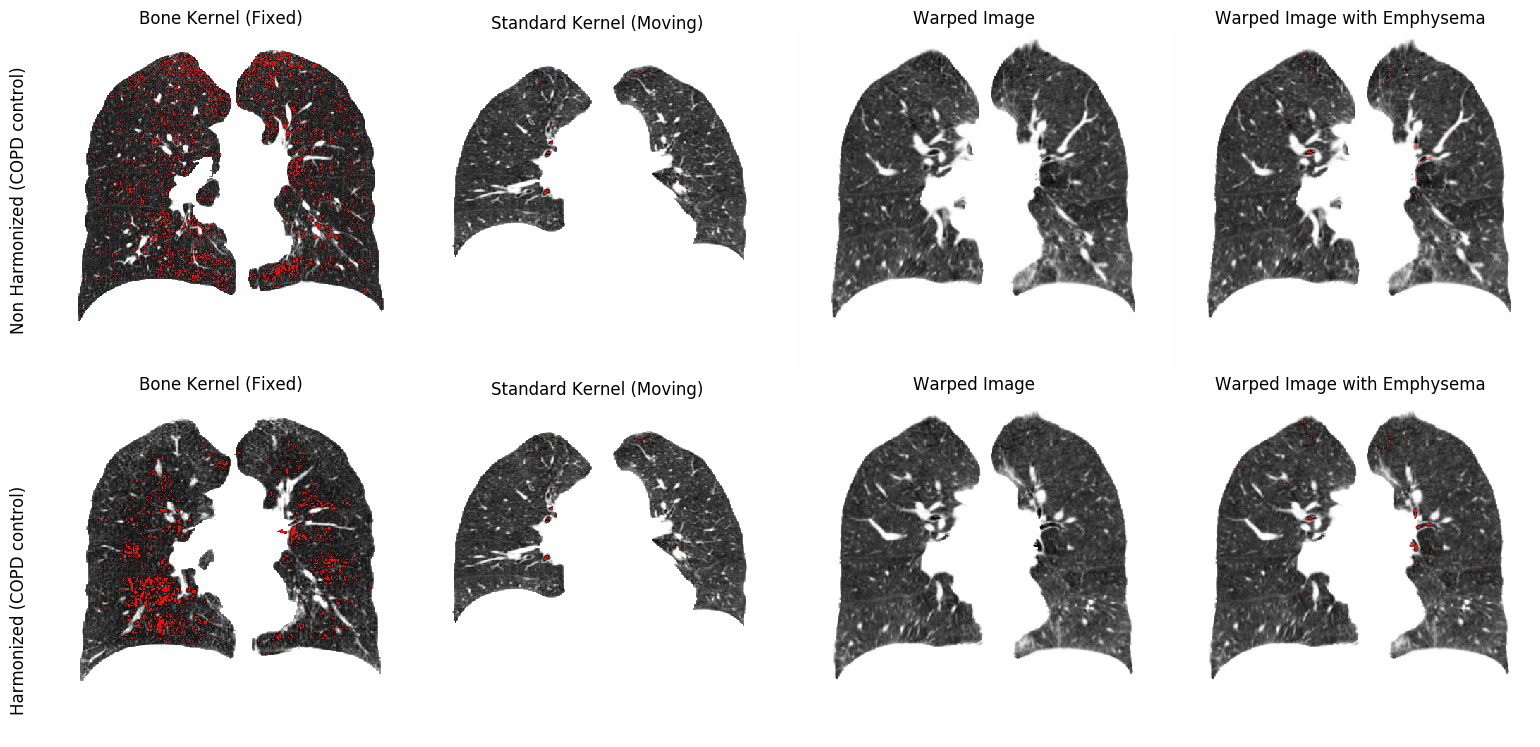

In [39]:
# Function to overlay mask on image
def overlay_mask(image, mask, color=(255, 0, 0), alpha=1.0):
    # Convert image to uint8
    image_uint8 = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    
    # Convert grayscale image to BGR
    image_bgr = cv2.cvtColor(image_uint8, cv2.COLOR_GRAY2BGR)
    
    # Create a color mask
    color_mask = np.zeros_like(image_bgr)
    color_mask[mask == 1] = color
    
    # Overlay the color mask on the image
    overlay = cv2.addWeighted(image_bgr, 1, color_mask, alpha, 0)
    return overlay

# Get middle coronal slices and rotate by 90 degrees
bone_mid_slice = np.rot90(bone[:, bone.shape[1] // 2, :])
std_mid_slice = np.rot90(std[:, std.shape[1] // 2, :])
bone_emph_mid_slice = np.rot90(bone_emph[:, bone_emph.shape[1] // 2, :])
std_emph_mid_slice = np.rot90(std_emph[:, std_emph.shape[1] // 2, :])
warped_mid_slice = np.rot90(warped[:, warped.shape[1] // 2, :])
warped_emph_mid_slice = np.rot90(warped_emph[:, warped_emph.shape[1] // 2, :])
bone_harm_mid_slice = np.rot90(bone_harm[:, bone_harm.shape[1] // 2, :])
bone_harm_emph_mid_slice = np.rot90(bone_harm_emph[:, bone_harm_emph.shape[1] // 2, :])
warped_harm_mid_slice = np.rot90(warped_harm[:, warped_harm.shape[1] // 2, :])
warped_harm_emph_mid_slice = np.rot90(warped_harm_emph[:, warped_harm_emph.shape[1] // 2, :])

# Create figure
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Plot non-harmonized images
axes[0, 0].imshow(overlay_mask(bone_mid_slice, bone_emph_mid_slice))
axes[0, 0].set_title('Bone Kernel (Fixed)')
axes[0, 0].axis('off')

axes[0, 1].imshow(overlay_mask(std_mid_slice, std_emph_mid_slice))
axes[0, 1].set_title('Standard Kernel (Moving)')
axes[0, 1].axis('off')

axes[0, 2].imshow(cv2.cvtColor(cv2.normalize(warped_mid_slice, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8), cv2.COLOR_GRAY2BGR))
axes[0, 2].set_title('Warped Image')
axes[0, 2].axis('off')

axes[0, 3].imshow(overlay_mask(warped_mid_slice, warped_emph_mid_slice))
axes[0, 3].set_title('Warped Image with Emphysema')
axes[0, 3].axis('off')

# Plot harmonized images
axes[1, 0].imshow(overlay_mask(bone_harm_mid_slice, bone_harm_emph_mid_slice))
axes[1, 0].set_title('Bone Kernel (Fixed)')
axes[1, 0].axis('off')

axes[1, 1].imshow(overlay_mask(std_mid_slice, std_emph_mid_slice))
axes[1, 1].set_title('Standard Kernel (Moving)')
axes[1, 1].axis('off')

axes[1, 2].imshow(cv2.cvtColor(cv2.normalize(warped_harm_mid_slice, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8), cv2.COLOR_GRAY2BGR))
axes[1, 2].set_title('Warped Image')
axes[1, 2].axis('off')

axes[1, 3].imshow(overlay_mask(warped_harm_mid_slice, warped_harm_emph_mid_slice))
axes[1, 3].set_title('Warped Image with Emphysema')
axes[1, 3].axis('off')

# Add shared y-labels
fig.text(0.04, 0.75, 'Non Harmonized (COPD control)', va='center', rotation='vertical', fontsize=12)
fig.text(0.04, 0.25, 'Harmonized (COPD control)', va='center', rotation='vertical', fontsize=12)

# Adjust layout
plt.tight_layout(rect=[0.05, 0.05, 1, 1])  # Adjust rect to make space for labels
plt.show()

In [49]:
#Include cases and controls:
# Function to overlay mask on image
def overlay_mask(image, mask, color=(255, 0, 0), alpha=1.0):
    # Convert image to uint8
    image_uint8 = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    
    # Convert grayscale image to BGR
    image_bgr = cv2.cvtColor(image_uint8, cv2.COLOR_GRAY2BGR)
    
    # Create a color mask
    color_mask = np.zeros_like(image_bgr)
    color_mask[mask == 1] = color
    
    # Overlay the color mask on the image
    overlay = cv2.addWeighted(image_bgr, 1, color_mask, alpha, 0)
    return overlay

# Get middle coronal slices and rotate by 90 degrees
bone_mid_slice = np.rot90(bone[:, bone.shape[1] // 2, :])
std_mid_slice = np.rot90(std[:, std.shape[1] // 2, :])
bone_emph_mid_slice = np.rot90(bone_emph[:, bone_emph.shape[1] // 2, :])
std_emph_mid_slice = np.rot90(std_emph[:, std_emph.shape[1] // 2, :])
warped_mid_slice = np.rot90(warped[:, warped.shape[1] // 2, :])
warped_emph_mid_slice = np.rot90(warped_emph[:, warped_emph.shape[1] // 2, :])
bone_harm_mid_slice = np.rot90(bone_harm[:, bone_harm.shape[1] // 2, :])
bone_harm_emph_mid_slice = np.rot90(bone_harm_emph[:, bone_harm.shape[1] // 2, :])
warped_harm_mid_slice = np.rot90(warped_harm[:, warped_harm.shape[1] // 2, :])
warped_harm_emph_mid_slice = np.rot90(warped_harm_emph[:, warped_harm_emph.shape[1] // 2, :])

# Get middle coronal slices for cases and rotate by 90 degrees
bone_case_mid_slice = np.rot90(bone_case[:, bone_case.shape[1] // 2, :])
std_case_mid_slice = np.rot90(std_case[:, std_case.shape[1] // 2, :])
bone_emph_case_mid_slice = np.rot90(bone_emph_case[:, bone_emph_case.shape[1] // 2, :])
std_emph_case_mid_slice = np.rot90(std_emph_case[:, std_emph_case.shape[1] // 2, :])
warped_case_mid_slice = np.rot90(warped_case[:, warped_case.shape[1] // 2, :])
warped_emph_case_mid_slice = np.rot90(warped_emph_case[:, warped_emph_case.shape[1] // 2, :])
bone_harm_case_mid_slice = np.rot90(bone_harm_case[:, bone_harm_case.shape[1] // 2, :])
bone_harm_emph_case_mid_slice = np.rot90(bone_harm_emph_case[:, bone_harm_emph_case.shape[1] // 2, :])
warped_harm_case_mid_slice = np.rot90(warped_harm_case[:, warped_harm_case.shape[1] // 2, :])
warped_harm_emph_case_mid_slice = np.rot90(warped_harm_emph_case[:, warped_harm_emph_case.shape[1] // 2, :])

# Create figure
fig, axes = plt.subplots(4, 4, figsize=(16, 16))

# Plot non-harmonized images for controls
axes[0, 0].imshow(overlay_mask(bone_mid_slice, bone_emph_mid_slice))
axes[0, 0].set_title('Bone Kernel (Fixed)')
axes[0, 0].axis('off')

axes[0, 1].imshow(overlay_mask(std_mid_slice, std_emph_mid_slice))
axes[0, 1].set_title('Standard Kernel (Moving)')
axes[0, 1].axis('off')

axes[0, 2].imshow(cv2.cvtColor(cv2.normalize(warped_mid_slice, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8), cv2.COLOR_GRAY2BGR))
axes[0, 2].set_title('Warped Image')
axes[0, 2].axis('off')

axes[0, 3].imshow(overlay_mask(warped_mid_slice, warped_emph_mid_slice))
axes[0, 3].set_title('Warped Image with Emphysema')
axes[0, 3].axis('off')

# Plot harmonized images for controls
axes[1, 0].imshow(overlay_mask(bone_harm_mid_slice, bone_harm_emph_mid_slice))
axes[1, 0].set_title('Bone Kernel (Fixed)')
axes[1, 0].axis('off')

axes[1, 1].imshow(overlay_mask(std_mid_slice, std_emph_mid_slice))
axes[1, 1].set_title('Standard Kernel (Moving)')
axes[1, 1].axis('off')

axes[1, 2].imshow(cv2.cvtColor(cv2.normalize(warped_harm_mid_slice, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8), cv2.COLOR_GRAY2BGR))
axes[1, 2].set_title('Warped Image')
axes[1, 2].axis('off')

axes[1, 3].imshow(overlay_mask(warped_harm_mid_slice, warped_harm_emph_mid_slice))
axes[1, 3].set_title('Warped Image with Emphysema')
axes[1, 3].axis('off')

# Plot non-harmonized images for cases
axes[2, 0].imshow(overlay_mask(bone_case_mid_slice, bone_emph_case_mid_slice))
axes[2, 0].set_title('Bone Kernel (Fixed)')
axes[2, 0].axis('off')

axes[2, 1].imshow(overlay_mask(std_case_mid_slice, std_emph_case_mid_slice))
axes[2, 1].set_title('Standard Kernel (Moving)')
axes[2, 1].axis('off')

axes[2, 2].imshow(cv2.cvtColor(cv2.normalize(warped_case_mid_slice, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8), cv2.COLOR_GRAY2BGR))
axes[2, 2].set_title('Warped Image')
axes[2, 2].axis('off')

axes[2, 3].imshow(overlay_mask(warped_case_mid_slice, warped_emph_case_mid_slice))
axes[2, 3].set_title('Warped Image with Emphysema')
axes[2, 3].axis('off')

# Plot harmonized images for cases
axes[3, 0].imshow(overlay_mask(bone_harm_case_mid_slice, bone_harm_emph_case_mid_slice))
axes[3, 0].set_title('Bone Kernel (Fixed)')
axes[3, 0].axis('off')

axes[3, 1].imshow(overlay_mask(std_case_mid_slice, std_emph_case_mid_slice))
axes[3, 1].set_title('Standard Kernel (Moving)')
axes[3, 1].axis('off')

axes[3, 2].imshow(cv2.cvtColor(cv2.normalize(warped_harm_case_mid_slice, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8), cv2.COLOR_GRAY2BGR))
axes[3, 2].set_title('Warped Image')
axes[3, 2].axis('off')

axes[3, 3].imshow(overlay_mask(warped_harm_case_mid_slice, warped_harm_emph_case_mid_slice))
axes[3, 3].set_title('Warped Image with Emphysema')
axes[3, 3].axis('off')

# Add shared y-labels
fig.text(0.04, 0.875, 'Non Harmonized (COPD control)', va='center', rotation='vertical', fontsize=12)
fig.text(0.04, 0.625, 'Harmonized (COPD control)', va='center', rotation='vertical', fontsize=12)
fig.text(0.04, 0.375, 'Non Harmonized (COPD case)', va='center', rotation='vertical', fontsize=12)
fig.text(0.04, 0.125, 'Harmonized (COPD case)', va='center', rotation='vertical', fontsize=12)

plt.tight_layout(rect=[0.05, 0.05, 1, 1])  # Adjust rect to make space for labels
plt.show()

NameError: name 'warped_harm_case' is not defined